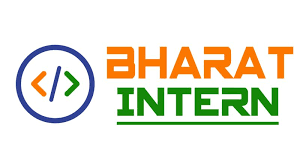

# Data Science Internship 
# - Anisha Walde
# Task 3 - Number Recognition 

Handwritten Digit Recognition Using Neural Networks and the MNIST Dataset

In [1]:
#import libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the neural network model:

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model:

In [10]:
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.9153 - val_loss: 0.1409 - val_accuracy: 0.9595
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1437 - accuracy: 0.9568 - val_loss: 0.1040 - val_accuracy: 0.9677
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1085 - accuracy: 0.9670 - val_loss: 0.0926 - val_accuracy: 0.9701
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9737 - val_loss: 0.0738 - val_accuracy: 0.9772
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0744 - accuracy: 0.9769 - val_loss: 0.0741 - val_accuracy: 0.9775
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0665 - accuracy: 0.9780 - val_loss: 0.0688 - val_accuracy: 0.9797
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9811 - val_loss: 0.0675 - val_accuracy:

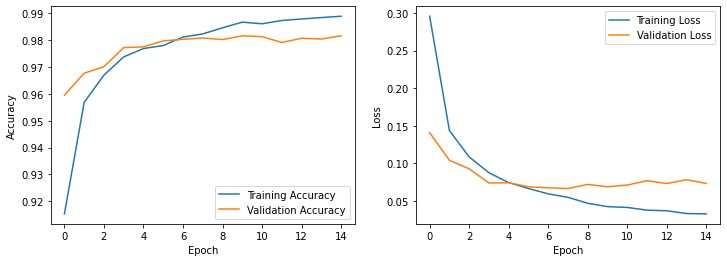

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model on the test data:

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 0s - loss: 0.0732 - accuracy: 0.9816 - 361ms/epoch - 1ms/step

Test accuracy: 0.9815999865531921


# Make predictions:

In [13]:
# Softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


# Visualize the results:

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100 * np.max(predictions_array),
                                         true_label),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


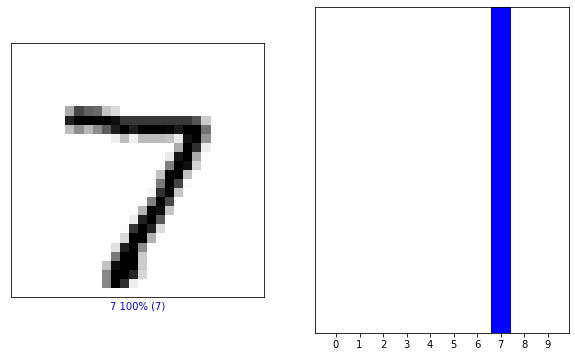

In [15]:
# Replace '0' with the index of the image you want to visualize
i = 0
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

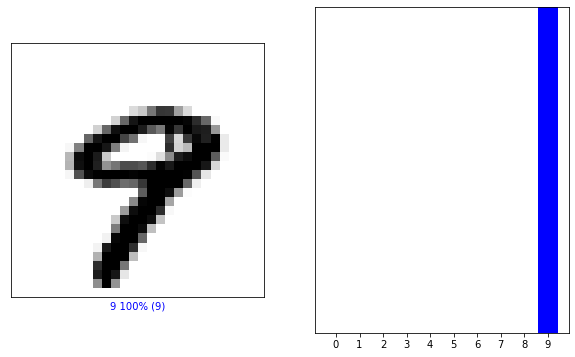

In [16]:
i = 9
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

# Confusion Matrix:

Text(0.5, 1.0, 'Confusion Matrix')

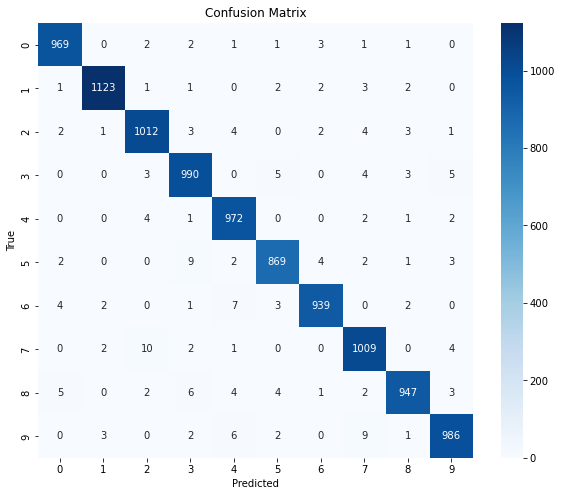

In [17]:
conf_matrix = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Randomly Selected Predictions:

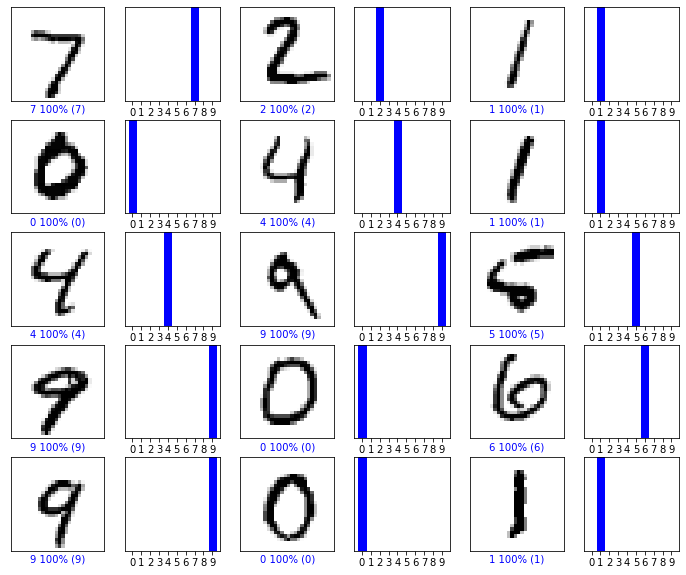

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

# Misclassified Images:

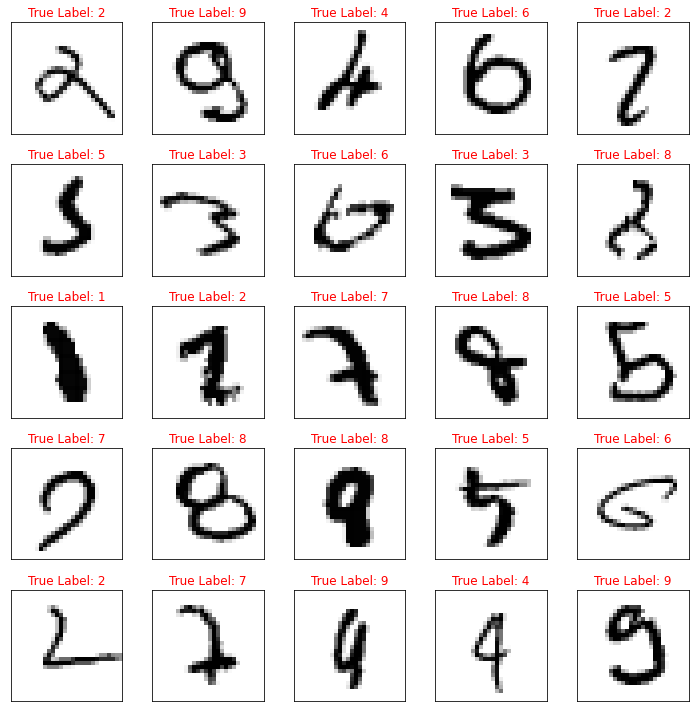

In [19]:
misclassified_idx = np.where(np.argmax(predictions, axis=1) != test_labels)[0]

# Define the number of rows and columns for the grid
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(10, 10))
for i in range(num_images):
    idx = misclassified_idx[i]
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[idx], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'True Label: {test_labels[idx]}', color='red')

plt.tight_layout()
plt.show()

Thank You 